## Feature scaling
- Reference: http://cs231n.github.io/neural-networks-2/
- Three common forms
    - **Mean substraction:** "substracting the mean across every individual feature in the data"
    - **Normalization** <br>
        1) "divide each dimension by its standard deviation, onece it has been zero-centered" <br>
        2) "normalizes each dimension so that the min and max along the dimension is -1 and 1 respectively"

### Load dataset

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = datasets.load_digits()

In [3]:
X_data = data.images   # load X_data
y_data = data.target   # load y_data

In [4]:
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1] * X_data.shape[2])    # flatten X_data

In [5]:
print(X_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


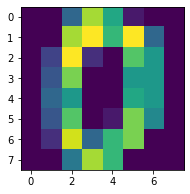

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (3,3))
plt.imshow(X_data[0].reshape((8,8)))
plt.show()

### 0. Without feature scaling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

In [30]:
clf = MLPClassifier(hidden_layer_sizes = (20, 20))   # create a MLP with twenty hidden layers with five neurons

In [31]:
clf.fit(X_train, y_train)

C:\Users\Buomsoo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
print(accuracy_score(y_pred, y_test))

0.948148148148


### 1. Mean substraction

In [22]:
len(np.mean(X_data, axis = 0))

64

In [15]:
X_scaled = X_data - np.mean(X_data, axis = 0) # axis = 0 means on each column

In [20]:
print(np.mean(X_scaled, axis = 0))

[  0.00000000e+00  -1.23910033e-15   4.92378042e-15   3.92044030e-15
   1.36118162e-15  -1.73286229e-15  -1.47214214e-15  -4.54993738e-16
  -5.88087669e-18   5.09442238e-15   1.78920750e-15  -1.86828850e-15
   5.33005903e-15  -7.62835043e-15   2.86989872e-15   5.59220017e-16
   3.26460092e-17   3.32535582e-15   1.96615123e-15  -3.14050399e-15
   5.26580572e-15   2.44508550e-15  -2.36130907e-16  -4.61071545e-16
  -1.87662907e-18  -1.02063909e-15  -2.78365101e-15  -3.34908012e-15
  -3.08514730e-15  -4.52738694e-15  -4.62722669e-15  -1.04257171e-17
   0.00000000e+00   1.74126465e-15  -4.07316547e-15  -2.69863894e-16
  -2.91018060e-15  -4.08255634e-16  -5.83790729e-15   0.00000000e+00
  -1.76542142e-17   1.04411626e-15   5.59893441e-15  -5.58509524e-16
   6.54592932e-15  -2.27357859e-15   1.97331794e-15   1.56482290e-16
   6.86340399e-17  -5.92118946e-16   8.58028791e-16  -5.83420037e-15
   3.58138054e-15   3.90462410e-16   5.69877417e-15  -6.90228805e-16
   6.56820174e-18  -5.14644285e-16

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

In [23]:
clf = MLPClassifier(hidden_layer_sizes = (20, 20))   # create a MLP with twenty hidden layers with five neurons

In [26]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(accuracy_score(y_pred, y_test))

0.957407407407


### 2. Normalization - 1

In [38]:
X_scaled = X_data - np.mean(X_data, axis = 0)

In [39]:
X_scaled

array([[ 0.        , -0.30383973, -0.20478575, ..., -6.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  3.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -5.20478575, ...,  9.2359488 ,
         6.93210907, -0.36449638],
       ..., 
       [ 0.        , -0.30383973, -4.20478575, ..., -0.7640512 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973, -3.20478575, ...,  5.2359488 ,
        -2.06789093, -0.36449638],
       [ 0.        , -0.30383973,  4.79521425, ...,  5.2359488 ,
        -1.06789093, -0.36449638]])

In [35]:
print(np.mean(X_scaled, axis = 0))

[  0.00000000e+00  -1.23910033e-15   4.92378042e-15   3.92044030e-15
   1.36118162e-15  -1.73286229e-15  -1.47214214e-15  -4.54993738e-16
  -5.88087669e-18   5.09442238e-15   1.78920750e-15  -1.86828850e-15
   5.33005903e-15  -7.62835043e-15   2.86989872e-15   5.59220017e-16
   3.26460092e-17   3.32535582e-15   1.96615123e-15  -3.14050399e-15
   5.26580572e-15   2.44508550e-15  -2.36130907e-16  -4.61071545e-16
  -1.87662907e-18  -1.02063909e-15  -2.78365101e-15  -3.34908012e-15
  -3.08514730e-15  -4.52738694e-15  -4.62722669e-15  -1.04257171e-17
   0.00000000e+00   1.74126465e-15  -4.07316547e-15  -2.69863894e-16
  -2.91018060e-15  -4.08255634e-16  -5.83790729e-15   0.00000000e+00
  -1.76542142e-17   1.04411626e-15   5.59893441e-15  -5.58509524e-16
   6.54592932e-15  -2.27357859e-15   1.97331794e-15   1.56482290e-16
   6.86340399e-17  -5.92118946e-16   8.58028791e-16  -5.83420037e-15
   3.58138054e-15   3.90462410e-16   5.69877417e-15  -6.90228805e-16
   6.56820174e-18  -5.14644285e-16

In [40]:
print(np.std(X_scaled, axis = 0))    # there exist features with 0 std

[ 0.          0.90693964  4.75350317  4.24765948  4.28619491  5.66484088
  3.32484969  1.03709417  0.09419533  3.19527098  5.41994694  3.97643575
  4.78134964  6.05127561  3.58532293  0.82768465  0.06235094  3.57530605
  5.68918332  5.80104695  6.17400993  6.19559718  3.25896254  0.43847543
  0.03334258  3.14565685  6.19031469  5.88129939  6.15038083  5.87092136
  3.68543009  0.04712725  0.          3.4794038   6.32292731  6.26664682
  5.93183902  5.86901393  3.53629836  0.          0.14514503  2.98098645
  6.53613529  6.43958504  6.25776954  5.69394162  4.32974601  0.30727036
  0.20416633  1.74566694  5.64292531  5.22549314  5.30057302  6.02947606
  4.91803706  0.98412698  0.02358333  0.9340418   5.1015993   4.37347662
  4.93257433  5.89898069  4.08940957  1.85960409]


In [41]:
std = np.std(X_scaled, axis = 0) + 0.00001    # add a minute number to prevent divide by zero

In [42]:
X_scaled /= std    # divde by standard deviation

In [43]:
print(np.std(X_scaled, axis = 0))

array([ 0.        ,  0.99988975,  0.99997896,  0.99997646,  0.99997667,
        0.99998235,  0.99996992,  0.99990359,  0.9989395 ,  0.9999687 ,
        0.99998155,  0.99997485,  0.99997909,  0.99998347,  0.99997211,
        0.9998792 ,  0.99839874,  0.99997203,  0.99998242,  0.99998276,
        0.9999838 ,  0.99998386,  0.99996932,  0.99977199,  0.9970098 ,
        0.99996821,  0.99998385,  0.999983  ,  0.99998374,  0.99998297,
        0.99997287,  0.99788258,  0.        ,  0.99997126,  0.99998418,
        0.99998404,  0.99998314,  0.99998296,  0.99997172,  0.        ,
        0.99931151,  0.99996646,  0.9999847 ,  0.99998447,  0.99998402,
        0.99998244,  0.9999769 ,  0.99967466,  0.99951044,  0.99994272,
        0.99998228,  0.99998086,  0.99998113,  0.99998342,  0.99997967,
        0.9998984 ,  0.99577762,  0.99989295,  0.9999804 ,  0.99997714,
        0.99997973,  0.99998305,  0.99997555,  0.99994623])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

In [45]:
clf = MLPClassifier(hidden_layer_sizes = (20, 20))   # create a MLP with twenty hidden layers with five neurons

In [46]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
print(accuracy_score(y_pred, y_test))

0.95


### 3. Normalization - 2

In [59]:
X_scaled = (X_data - np.mean(X_data, axis = 0))/(np.max(X_data, axis = 0) - np.min(X_data, axis = 0) + 0.00001)  # add a minute number to prevent divide by zero

In [65]:
print(X_scaled.max(axis = 0))

[ 0.          0.96201883  0.67470047  0.26025999  0.25949483  0.63863344
  0.91485753  0.9913553   0.9972126   0.87538203  0.35110579  0.25128671
  0.35754012  0.48900915  0.88459878  0.9910027   0.9986038   0.83740209
  0.38105151  0.56295179  0.55637834  0.51210319  0.88821592  0.99373832
  0.99887705  0.83535466  0.43179578  0.44866416  0.37955597  0.5280325
  0.84548265  0.99776409  0.          0.8328955   0.52079823  0.43301308
  0.35614891  0.4534986   0.79219277  0.          0.99777157  0.90101502
  0.56990782  0.54823978  0.52048521  0.48521812  0.78397975  0.99545373
  0.99909447  0.95596768  0.53081492  0.40379774  0.41148416  0.45259432
  0.76718093  0.98411807  0.99943352  0.96895954  0.65264984  0.24443502
  0.26192944  0.57724644  0.87075627  0.97721837]


In [66]:
print(X_scaled.min(axis = 0))

[  0.00000000e+00  -3.79799191e-02  -3.25298906e-01  -7.39739382e-01
  -7.40504546e-01  -3.61365940e-01  -8.51418500e-02  -8.64403059e-03
  -2.78240122e-03  -1.24617340e-01  -6.48893584e-01  -7.48712665e-01
  -6.42459253e-01  -5.10990220e-01  -1.15400596e-01  -8.99646811e-03
  -1.39120061e-03  -1.62597283e-01  -6.18947860e-01  -4.37047584e-01
  -4.43621036e-01  -4.87896189e-01  -1.11783458e-01  -6.26042623e-03
  -1.11295492e-03  -1.64644669e-01  -5.68203596e-01  -5.51335215e-01
  -6.20443407e-01  -4.71966873e-01  -1.54516684e-01  -2.22590985e-03
   0.00000000e+00  -1.67103784e-01  -4.79201147e-01  -5.66986290e-01
  -6.43850460e-01  -5.46500771e-01  -2.07806513e-01   0.00000000e+00
  -2.22592654e-03  -9.89843566e-02  -4.30091551e-01  -4.51759595e-01
  -4.79514169e-01  -5.14781259e-01  -2.16019620e-01  -4.54460382e-03
  -9.04283789e-04  -4.40316920e-02  -4.69184459e-01  -5.96201631e-01
  -5.88515214e-01  -5.47405056e-01  -2.32818441e-01  -1.58811573e-02
  -5.56477462e-04  -3.10393521e-02

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size = 0.3, random_state = 7)    # split data into train & test set

In [61]:
clf = MLPClassifier(hidden_layer_sizes = (20, 20))   # create a MLP with twenty hidden layers with five neurons

In [62]:
clf.fit(X_train, y_train)

C:\Users\Buomsoo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
print(accuracy_score(y_pred, y_test))

0.961111111111
